# Classification Project
### nateghiiman@gmail.com
**Machine Learning With Python** Course 2nd Project

## Description
In this project, we have to predict whether a patient has a heart attack or is likely to have a heart attack according to the medical information of a patient, which is saved in heart.csv file.

## ETL

In [1]:
### first we import the liraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

### Get & assess data

In [2]:
df=pd.read_csv("C:/python/Jadi_ML/01 Iman/3-1 heart.csv" ,index_col=False)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

### Change the Pandas DataFrame to **NumpyArray**
In order to use sikit-learn

In [5]:
print(df.columns)
#xy=df.to_numpy()
#print(df)
#x=xy[:,:-1]
#y=xy[:,-1]
x=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y=df['output'].values

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


### Normalize Data
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [6]:
x_scaler=preprocessing.StandardScaler().fit(x)
x=x_scaler.transform(x)

### Train/Test Split
Training the model on one sample and testing it on another, helps us **avoid overfitting!**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
type (x_train[0,0])

numpy.float64

## K Nearest Neighbour (KNN)
! error handling: when I added "from sklearn.neighbors import KNeighborsClassifier" I got an error "module 'numpy' has no attribute 'float'" 
So I downgraded numpy version **"pip install "numpy<1.24""**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
print(np.version.version)

1.23.5


### Training

In [9]:
k=4
knn=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

### Predicting

In [10]:
yhat=knn.predict(x_test)
print(yhat)

[0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0]


c:\python\venv\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Accuracy Evaluation

In [11]:
print("Tran Set Accuracy:", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test,yhat))

Tran Set Accuracy: 0.9008264462809917
Test Set Accuracy: 0.7377049180327869


c:\python\venv\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Check other Ks
we want to decide wich number of Ks gives us the best accuracy

In [41]:
number_of_Ks=10
Ks=list(range(1,number_of_Ks+1))
accuracy=np.zeros(number_of_Ks)
std_acc=np.zeros(number_of_Ks)
jaccard=np.zeros(number_of_Ks)
trainaccuracy=np.zeros(number_of_Ks)
Ks
for k in Ks:
    knn=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    accuracy[k-1]=metrics.accuracy_score(yhat,y_test)
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    jaccard[k-1]=metrics.jaccard_score(yhat,y_test)
    trainaccuracy[k-1]=metrics.accuracy_score(knn.predict(x_train),y_train)
print("Train Set Accurcy:\n",trainaccuracy)
print("Test Set Jaccard Score:\n",jaccard)
print("Test Set Accuracy:\n",accuracy) 

Train Set Accurcy:
 [1.         0.91735537 0.90495868 0.90082645 0.88429752 0.88842975
 0.88016529 0.88842975 0.88842975 0.87190083]
Test Set Jaccard Score:
 [0.55       0.54054054 0.575      0.57894737 0.625      0.56410256
 0.66666667 0.63157895 0.69230769 0.66666667]
Test Set Accuracy:
 [0.70491803 0.72131148 0.72131148 0.73770492 0.75409836 0.72131148
 0.78688525 0.7704918  0.80327869 0.78688525]


c:\python\venv\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\python\venv\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False 

Checking The above result **k=9** seems to be the best

In [42]:
print(metrics.classification_report(yhat,y_test))
print(metrics.confusion_matrix(yhat,y_test))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

[[22  5]
 [ 8 26]]


### Plot

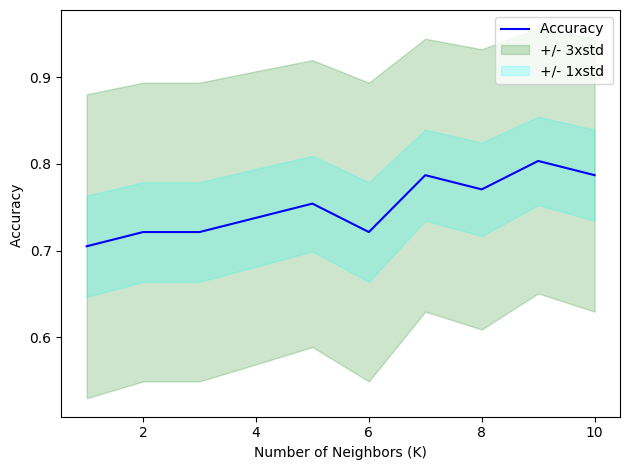

In [44]:
plt.plot(Ks,accuracy,"-b")
plt.fill_between(Ks,accuracy-3*std_acc,accuracy+3*std_acc,color='green', alpha=0.2)
plt.fill_between(Ks,accuracy-1*std_acc,accuracy+1*std_acc,color='cyan', alpha=0.2)
plt.legend(('Accuracy ', '+/- 3xstd','+/- 1xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()